# Situación problema 

### Players FIFA 21

La base de datos a utilizar contiene los atributos de los 100 jugadores de futbol con mayor calificación en las cartas de modo carrera del videojuego FIFA 21

A través de su análisis y aplicación de elementos gráficos, se responderán 5 preguntas/hipótesis planteadas

https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

### Limpieza de la base de datos

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('modocarrera_fifa21.csv')
df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,28/06/1991,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,20/12/1998,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,30/04/1992,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,08/07/1991,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,02/10/1992,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 106 entries, sofifa_id to rb
dtypes: float64(15), int64(48), object(43)
memory usage: 82.9+ KB


In [5]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [6]:
df = df.drop(['sofifa_id', 'player_url','long_name','dob','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], axis=1)
df.head(3)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1,93,93,...,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1,92,92,...,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1,91,93,...,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3


In [7]:
df.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality',
       'club_name', 'league_name', 'league_rank', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
    

In [8]:
df = df.drop(['league_rank','wage_eur','player_positions','ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
              'preferred_foot','international_reputation', 'weak_foot', 'skill_moves', 'work_rate','cm','rcm', 'rm','body_type', 'real_face', 
              'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from','joined','contract_valid_until', 
              'nation_position', 'nation_jersey_number','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 
              'player_traits', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys', 
              'skill_dribbling','skill_curve', 'skill_fk_accuracy', 'skill_long_passing','skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
              'movement_agility', 'movement_reactions', 'movement_balance','power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
              'power_long_shots', 'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties',
              'mentality_composure', 'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving','goalkeeping_handling', 
              'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes','height_cm','weight_kg','club_name','potential','pace','passing',
              'dribbling','physic'], axis=1)
df.head()

,short_name,age,nationality,league_name,overall,value_eur,shooting,defending
0,L. Messi,33,Argentina,Spain Primera Division,93,67500000,92.0,38.0
1,Cristiano Ronaldo,35,Portugal,Italian Serie A,92,46000000,93.0,35.0
2,J. Oblak,27,Slovenia,Spain Primera Division,91,75000000,NaN,NaN
3,R. Lewandowski,31,Poland,German 1. Bundesliga,91,80000000,91.0,43.0
4,Neymar Jr,28,Brazil,French Ligue 1,91,90000000,85.0,36.0


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   short_name   85 non-null     object 
 1   age          85 non-null     int64  
 2   nationality  85 non-null     object 
 3   league_name  85 non-null     object 
 4   overall      85 non-null     int64  
 5   value_eur    85 non-null     int64  
 6   shooting     85 non-null     float64
 7   defending    85 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.0+ KB


In [11]:
df.columns

Index(['short_name', 'age', 'nationality', 'league_name', 'overall',
       'value_eur', 'shooting', 'defending'],
      dtype='object')

### Descripción de las variables de interés

Las variables de interés son short_name, age, overall, league_name, nationality, shooting, defending y value_eur
* short_name es una variable categórica que describe el nombre de cada jugador
* age es una variable numérica discreta que explica la edad en años del jugador
* nationality es una variable categórica que describe la nacionalidad del jugador
* league_name es una variable categórica que describe la liga en la que se juega
* overall es una variable numérica discreta que explica la puntuación general del jugador en una escala del 1-100
* value_eur es una variable numérica discreta que explica el valor del jugador en euros
* shooting es una variable numérica discreta que califica el tiro del jugador en una escala del 1-100
* defending es una variable numérica discreta que califica las habilidades defensivas del jugador en una escala del 1-100

### Medidas de tendencia central y de dispersión

In [12]:
df.describe()

,age,overall,value_eur,shooting,defending
count,85.000000,85.000000,8.500000e+01,85.000000,85.000000
mean,28.223529,86.623529,4.731176e+07,73.447059,62.494118
std,3.765054,1.933271,1.749574e+07,13.930530,20.356714
min,19.000000,84.000000,1.150000e+07,28.000000,32.000000
25%,26.000000,85.000000,3.700000e+07,65.000000,43.000000
50%,28.000000,86.000000,4.600000e+07,78.000000,64.000000
75%,31.000000,87.000000,5.450000e+07,85.000000,82.000000
max,35.000000,93.000000,1.055000e+08,93.000000,91.000000


### Pregunta de investigación 1

#### ¿Existe una correlación entre la edad del jugador y su valor en el mercado?

Text(21, 105500000, 'Kylian Mbappé')

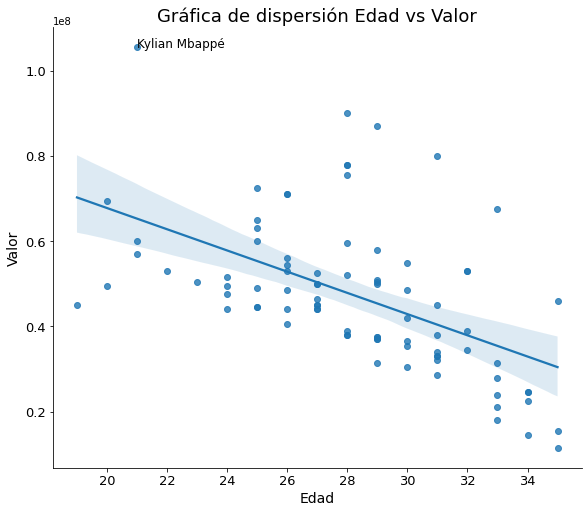

In [13]:
sns.lmplot(x = 'age',
           y = 'value_eur',
           data = df,
           height=7, aspect=7/6,
           #fit_reg = False
          )

plt.title('Gráfica de dispersión Edad vs Valor', fontsize=18)
plt.xlabel('Edad',fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Valor',fontsize=14)
plt.yticks(fontsize=13)
plt.text(21,105500000, 'Kylian Mbappé',fontsize=12)

#### Conclusión
A pesar de que se observa cierta relación entre la edad y el valor de un jugador (en donde los más jovenes suelen tener mayor valor en el mercado), esta no es lo suficientemente fuerte como para concluir que existe una correlación entre las variables.

### Pregunta de investigación 2

#### ¿Los jugadores de La Liga son mejores que los jugadores de la Premier League?

In [14]:
pivote1 = pd.pivot_table(df,
                         index = 'league_name',
                         values = 'overall',
                         aggfunc = 'mean',
                        )
df2 = pivote1
df2.head()

,overall
league_name,
English Premier League,86.718750
French Ligue 1,87.000000
German 1. Bundesliga,86.333333
Italian Serie A,86.058824
Spain Primera Division,86.950000


(array([86. , 86.2, 86.4, 86.6, 86.8, 87. , 87.2]),
 <a list of 7 Text major ticklabel objects>)

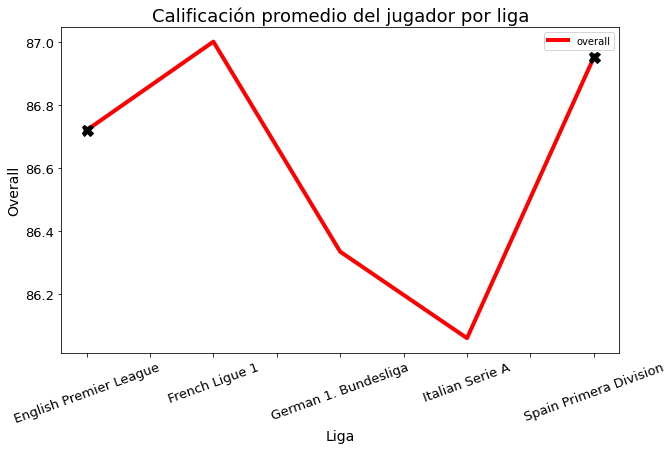

In [15]:
df2.plot(c='r',linewidth=4.0, figsize=(10,6))

plt.plot(0, 86.718750, "X", markersize=11, mfc='k', mec='k')
plt.plot(4, 86.950000, "X", markersize=11, mfc='k', mec='k')

plt.title('Calificación promedio del jugador por liga', fontsize=18)
plt.xlabel('Liga',fontsize=14)
plt.xticks(fontsize=13, rotation=20)
plt.ylabel('Overall',fontsize=14)
plt.yticks(fontsize=13)

#### Conclusión
Tomando en cuenta la variable 'overall', la cual representa una calificación que engloba todas las habilidades de los jugadores, podríamos decir que el futbolista promedio de La Liga española es mejor que el futbolista promedio de la Premier League

### Pregunta de investigación 3

#### ¿Existe algún sesgo en la variable 'defending' en La Liga Española?
debido a que los mejores ratings pertenecen a delanteros y medios

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text major ticklabel objects>)

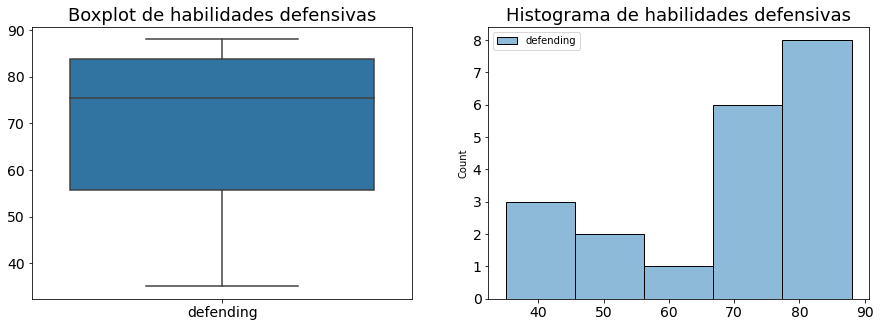

In [16]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(data = df.loc[df['league_name'] == 'Spain Primera Division',['defending']])
plt.title('Boxplot de habilidades defensivas', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
sns.histplot(data = df.loc[df['league_name'] == 'Spain Primera Division',['defending']],
            bins=5)
plt.title('Histograma de habilidades defensivas', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Conclusión
La variable 'defending' en la liga española si presenta un sesgo, ya que tiene una distribución asimetrica negativa. Esto se puede deber a que los mejores jugadores de la liga tienen altos valores en sus habilidades defensivas  

### Pregunta de investigación 4

#### ¿Qué nacionalidad tiene mejor promedio de shooting?

In [17]:
pivote2 = pd.pivot_table(df,
                         index = 'nationality',
                         values = 'shooting',
                         aggfunc = 'mean',
                        )
df3 = pivote2
df3.head(3)

,shooting
nationality,
Algeria,79.000000
Argentina,85.333333
Belgium,77.600000


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

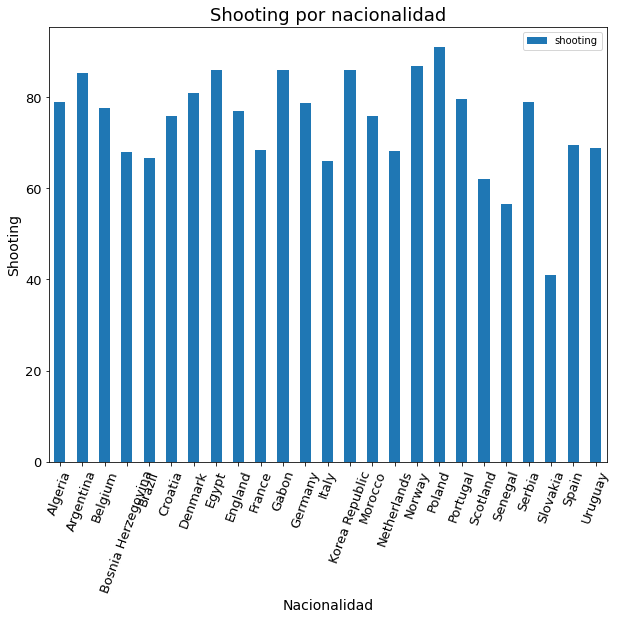

In [18]:
df3.plot(kind='bar', figsize=(10,8))

plt.title('Shooting por nacionalidad', fontsize=18)
plt.xlabel('Nacionalidad',fontsize=14)
plt.xticks(fontsize=13, rotation=70)
plt.ylabel('Shooting',fontsize=14)
plt.yticks(fontsize=13)

In [19]:
df3.max()

shooting    91.0
dtype: float64

#### Conclusión
El país con mejor puntuación en tiro es Polonia, con una calificación de 91.

### Pregunta de investigación 5

#### ¿El valor promedio de los jugadores de la serie A es mayor al de la Bundesliga?

In [20]:
pivote3 = pd.pivot_table(df,
                         index = 'league_name',
                         values = 'value_eur',
                         aggfunc = 'mean',
                        )
df4 = pivote3
df4.head()

,value_eur
league_name,
English Premier League,5.145312e+07
French Ligue 1,6.028571e+07
German 1. Bundesliga,5.194444e+07
Italian Serie A,3.894118e+07
Spain Primera Division,4.117500e+07


(array([35000000., 40000000., 45000000., 50000000., 55000000., 60000000.,
        65000000.]),
 <a list of 7 Text major ticklabel objects>)

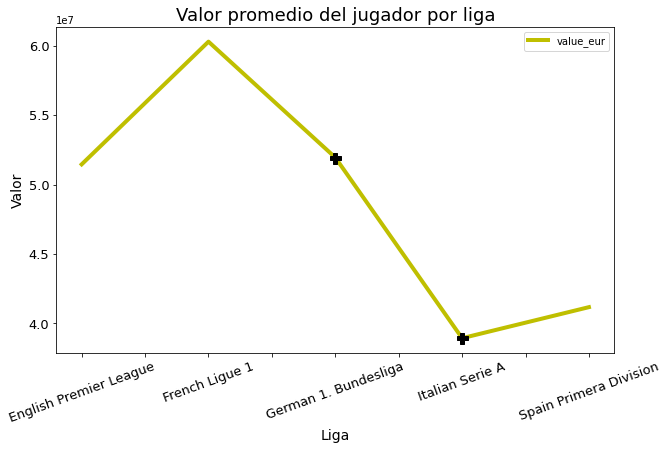

In [21]:
df4.plot(c='y',linewidth=4.0, figsize=(10,6))

plt.plot(2, 5.194444e+07, "P", markersize=11, mfc='k', mec='k')
plt.plot(3, 3.894118e+07, "P", markersize=11, mfc='k', mec='k')

plt.title('Valor promedio del jugador por liga', fontsize=18)
plt.xlabel('Liga',fontsize=14)
plt.xticks(fontsize=13, rotation=20)
plt.ylabel('Valor',fontsize=14)
plt.yticks(fontsize=13)

#### Conclusión
El valor promedio del jugador de la Bundesliga es significativamente más alto que el de la serie A.

En las ligas registradas, la serie A es la liga con el menor valor promedio por jugador.

### Limitaciones

* En la base de datos original existen algunos valores nulos dependiendo de la columna, debido a que a los porteros se les califica con distintos atributos
* Los datos no están actualizados a la temporada actual, sino a la 20/21, por lo que las ligas y equipos de algunos jugadores pertenecen a las pasadas
* En la base original existen muchos atributos que no aportan gran valor al análisis, como las ligas URL o los nombre completos de los jugadores